# 1
<b>Suppose the coefficient matrix of a linear system of three equations in three
variables has a pivot position in each column. Explain why the system
has a unique solution.</b>

Pivot cell can be defined as those holding the leading non-zero entry of each row, once we have taken our matrix to echelon form. If all our columns have one of those, then it means these pivots lie at different rows on each colum (otherwise, the rightmost cells repeating position will not be the first ones of their respective rows, contradicting the "leading non-zero" property).

Above means that the columns have all possible positions of the diagonal, for holding those pivots; except perhaps due a different order. If we apply a proper permutation (sequence of row swaps, aka, elementary operations), we can take the echelon form into a lower triangular matrix where all one pivots are within the diagonal. Going further, we can take this matrix into the reduced echelon form; which will be pretty much the identity matrix. 

The identity matrix's columns form a linearly independent set (canonical basis actually), hence by Theorem 10 from the notes, there exists a unique solution to the system $A\vec{x} = b$. The uniqueness is pretty much inherited from the uniqueness of the representation of $\vec{b}$, respecto to the basis formed by the columns of $A$ (that is, $\vec{x}$).






# 2
<b>
The solutions $\left(x,y\right)$ of a single linear equation $ax+by=c$
form a plane in $\mathbb{R}^{2}$ when $a,b$ are not all zero. Program
in Jupyter Notebook a program that plots a set of three linear equations
whose graphs
<ol>
<li>Intersect in a single point</li>
<li>They do no have intersection.</li>
</ol>
</b>

One easy way to specify lines, specially if we want to arrange them in certain way on the plan, is by giving a couple of points. We wrote then a routine that receives a list of lines specifications, each one consisting of a couple of points that define the line. The routine is generic and plots them all, and prints the slope for each line; the optional argument at the end allows to indicate desired portion of axis $X$, where we want to draw the line.

In [54]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lines(lines, range_x=[-10,10]):
    i = 0    
    for (p1,p2) in lines:
        x1,y1 = p1
        x2,y2 = p2        
        i += 1
        m = (y2 - y1) / (x2 - x1)
        y = lambda x: m*(x - x1) + y1
        xs = np.arange(range_x[0], range_x[1])
        plt.plot(xs, y(xs))
        print("slope line %d = %.2f" % (i, m))

Then, for the first part (insert in single point) we pass lines that intersect orthogonally.

slope line 1 = 1.00
slope line 2 = -1.00


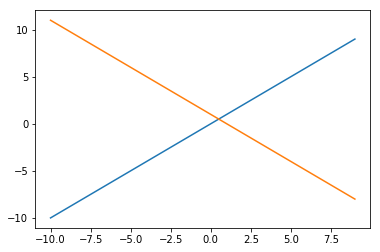

In [55]:
%matplotlib inline

line1 = [(0,0), (1,1)]
line2 = [(0,1), (1,0)]
plot_lines([line1, line2])

While for second  part (no intersection), we pass a couple of parallel lines (assuming Euclidean Geometry, which has as axiom that two parallel lines will never cross).

slope line 1 = 1.00
slope line 2 = 1.00


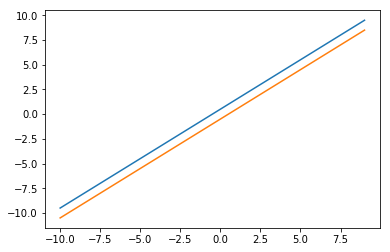

In [56]:
%matplotlib inline

line1 = [(0,0.5), (0.5,1)]
line2 = [(0.5,0), (1,0.5)]
plot_lines([line1, line2])

# 3

<b>Determine $h$ and $k$ such that the solution set of the system (i) is empty, (ii) contains a unique solution, and (iii) contains infinitely many solutions.</b>

Given the low dimension of the problem ($R^2$), we could keep exploiting the geometrical properties of the subspaces (lines). Each subcase being asked can be mapped into a particular geometrical situation with the two lines representing the equations:

<ul>
    <li>Empty solution set = parallel lines </li>
    <li>Unique solution = non parallel lines</li>
    <li>Infinitely many solutions = same line</li>
</ul>

But given we are dealing with the Gaussian Elimination algorithm, we should try to map these cases into situations found on the extended matrix, while running such procedure (could be at the very beginning, just considering the properties of the matrix itself). Below is the mapping:

<ul>
    <li>Empty solution set = contradiction found, like only zeros a particular row but the extended column being non zero.</li>
    <li>Unique solution = columns of matrix being linearly independent.</li>
    <li>Infinitely many solutions = having free variables, meaning that some of the columns were linearly dependent of the others.</li>
</ul>

While is definitely easier to build the geometric objects that will lead to each scenario, we can try to combine both approaches. For example, we could propose the lines using geometric arguments; but use the matrix and the algorithm for the final conclusion. 

### (a)
\begin{align*}
x_{1}+3x_{2} & =k\\
4x_{1}+hx_{2} & =8
\end{align*}

#### (i) Empty solution set

The geometric argument here would tell us that we need a couple of parallel lines, which in $R^2$ can be characterized by having same slope $m$ according to canonical line equation (we replaced usual variable names $x$ and $y$ by $x_1$ and $y_1$, in order to match our problem names):

<center>$x_2 - a = m(x_1 - b)$</center>

Let us rewrite both equations in above form:

\begin{align*}
x_2 &= \frac{1}{3}(x_1 - k)\\
x_2 &= \frac{4}{h}(x_1 - 2)
\end{align*}

We can see that $k$ does not matter much (it just represents the translation in first axis, if we think our line comes from the origin). That we need is that the slopes become equal, that is:

\begin{align*}
\frac{1}{3} = \frac{4}{h} \implies \frac{3}{1} = \frac{h}{4} \implies h = 12
\end{align*}

Now, let us see what happens on the extended matrix when we have $h = 12$. Let us say that we make zeros below first pivot:

\begin{pmatrix}
    1 & 3 & k \\
    4 & 12 & 8
\end{pmatrix} 

After ${row_2 := row_2 - 4row_1}$

\begin{pmatrix}
    1 & 3 & k \\
    0 & 0 & 8 - 4k
\end{pmatrix}

We can see that the algebraic method runs a bit short here; if we set $k = 2$, the last row would vanish. This would lead us with a single equation, which in turn would mean that we have infinite solutions. But if we want to provoke a contradiction, we need $k \neq 2$. Because that will imply $8 - 4k \neq 0$, which in turn will bring the wanted contradiction (because the last row would be telling that a linear combination with coefficients equals all zero, leads to a non zero scalar). 

Therefore, we can lead to an empty solution set by picking any $(k,h)$ in the set $\{(x,12) \backepsilon x \neq 2\}$.

#### (ii) Unique solution

Leveraging our previos geometrical analysis, we can just tell that we want the slopes to be different; the Euclidean Geometry axioms guarantee that they will cross. Actually, we know that the only value of $h$ that makes the slopes equal is $12$; hence, as long as $h \neq 12$, we will have a single solution. Let us pick for simplicity $k = 0$ and $h = 1$, leading to equations:

\begin{align*}
x_2 &= \frac{x_1}{3}\\
x_2 &= 4(x_1 - 2)
\end{align*}

These two lines pass respectively through the points $\{(0,0),(1,\frac{1}{3})\}$ and $\{(0,-8),(\frac{1}{2},0)\}$. Let us plot them with our utility function <i>plot_lines</i> from previous exercise:

slope line 1 = 0.33
slope line 2 = 16.00


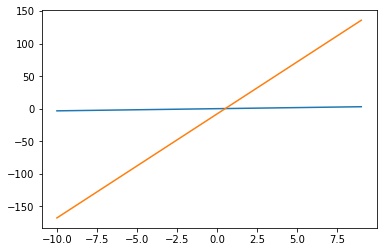

In [58]:
%matplotlib inline

line1 = [(0, 0), (1, 1/3.0)]
line2 = [(0, -8), (1/2.0, 0)]
plot_lines([line1, line2])

#### Infinitely many solutions

Per our analysis done for the case of Empty solution set, we know that setting $k = 2$ and $h = 12$ will eliminate the second row (all zeroes):

\begin{pmatrix}
    1 & 3 & 2 \\
    4 & 12 & 8
\end{pmatrix} 

After ${row_2 := row_2 - 4row_1}$

\begin{pmatrix}
    1 & 3 & 2 \\
    0 & 0 & 0
\end{pmatrix}

This lead us with single equation $x_1 + 3x_2 = 2$. Any point lying on that line would be a solution to our system.


### (a)

\begin{align*}
-2x_{1}+hx_{2} & =1\\
6x_{1}+kx_{2} & =8
\end{align*}

For this second system, we will leverage the geometric and algebraic arguments developed for the previous one; but trying to be brief to avoid repetition.

#### (i) Empty solution set

Setting both $h$ and $k$ to zero quickly leads to a contradiction in the extended matrix.

\begin{pmatrix}
    -2 & 0 & 1 \\
    6 & 0 & 8
\end{pmatrix} 

Above matrix tells us that $x_1$ needs to comply with two conditions what contradict with each other:

<table>
<tr>
<td>
\begin{align*}
-2x_1 &= 1 \\
6x_1 &= 8
\end{align*}
</td>
<td>
$\implies$
</td>
<td>
\begin{align*}
x_1 &= -\frac{1}{2} \\
x_1 &= \frac{4}{3}
\end{align*}
</td>
</tr>
</table>

#### (ii) Unique solution

Making $h = 6$ and $k = 2$ will make the colums of the associated matrix $A$ linearly independent (they are actually orthogonal):

$A\vec{x} = 
\begin{pmatrix}
-2 & 6 \\
6 & 2 
\end{pmatrix}
\vec{x}
=
\begin{pmatrix}
1 \\
8 
\end{pmatrix}
=
\vec{b}$

By Theorem 10 from the notes, we know that there is a unique solution.

#### Infinitely many solutions

Let us reduce the extended matrix a little bit, to see if we can eliminate entirely one row

\begin{pmatrix}
    -2 & h & 1 \\
    6 & k & 8
\end{pmatrix} 

Make $row_1 := -\frac{1}{2} row_1$

\begin{pmatrix}
    1 & -\frac{h}{2} & -\frac{1}{2} \\
    6 & k & 8
\end{pmatrix} 

Make $row_2 := row_2 - 6 row_1$

\begin{pmatrix}
    1 & -\frac{h}{2} & -\frac{1}{2} \\
    0 & k - 3h & 5
\end{pmatrix} 

We can see that is not possible to make the second row all zeroes; the best we can do is to pick $k = 3h$ to achieve a zero on second column, that the third column will remain as $5$. This means that this system will never have infinitely many solutions (just one or zero).
